In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read Dataset

dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
print(dataset.shape)

(20800, 5)


In [5]:
#Dropping the 'id' column

dataset.drop('id', axis=1, inplace=True)

In [6]:
dataset.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#Finding null values if any

dataset.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#Dropping NaN values beacuse they cannot be reshaped

dataset.dropna(inplace=True)

In [9]:
#Finding null values if any

dataset.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [10]:
dataset.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
print(dataset.shape[0])

18285


<Figure size 432x288 with 0 Axes>

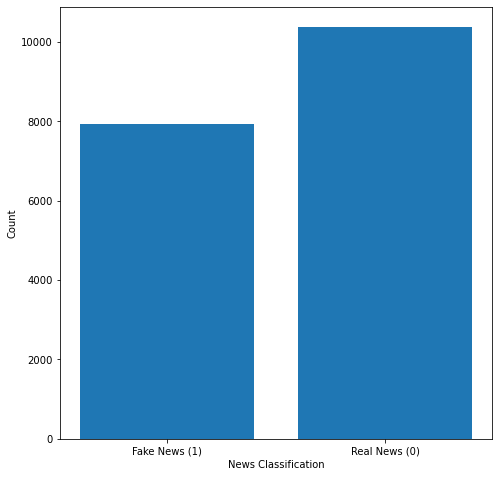

In [12]:
import matplotlib.pyplot as plt
ones = np.count_nonzero(dataset.label)
zeroes = dataset.shape[0] - ones
plt.figure()
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
news = ['Fake News (1)', 'Real News (0)']
count = [ones, zeroes]
ax.bar(news, count)
plt.xlabel('News Classification')
plt.ylabel('Count')
plt.show()

In [13]:
newsDataset = dataset.copy()
newsDataset.reset_index(inplace=True)

In [14]:
newsDataset.head()

,index,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [16]:
#Cleaning the dataset texts(news)

import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Tanay
[nltk_data]     Gandhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Cleaning the news
corpus = []

for i in range(0,newsDataset.shape[0]):
    news = re.sub(pattern='[^a-zA-Z]', repl=' ', string=newsDataset.title[i])
    news = news.lower()
    news = news.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    news = [ps.stem(word) for word in news if not word in set(all_stopwords)]
    news = ' '.join(news)
    corpus.append(news)

In [18]:
print(corpus[0:50])

['hous dem aid even see comey letter jason chaffetz tweet', 'flynn hillari clinton big woman campu breitbart', 'truth might get fire', 'civilian kill singl us airstrik identifi', 'iranian woman jail fiction unpublish stori woman stone death adulteri', 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart', 'beno hamon win french socialist parti presidenti nomin new york time', 'back channel plan ukrain russia courtesi trump associ new york time', 'obama organ action partner soro link indivis disrupt trump agenda', 'bbc comedi sketch real housew isi caus outrag', 'russian research discov secret nazi militari base treasur hunter arctic photo', 'us offici see link trump russia', 'ye paid govern troll social media blog forum websit', 'major leagu soccer argentin find home success new york time', 'well fargo chief abruptli step new york time', 'anonym donor pay million releas everyon arrest dakota access pipelin', 'fbi close hillari', 'chuck todd

In [19]:
#Getting the max features value

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [20]:
len(X[0])

13913

In [21]:
#Creating the Bag of Words model and keeping max features = 10000

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [22]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(y)

[1 0 1 ... 0 1 1]


In [24]:
#Splitting into train and dev sets

from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.20, random_state=0)

In [25]:
#After several experimentation, Logistic Regression Model is best suited for the dataset

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
#Predicting the Dev set results

y_pred = classifier.predict(X_dev)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_dev.reshape(len(y_dev),1)),1))

[[1 0]
 [1 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [27]:
#Making the Confusion Matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracyScore = accuracy_score(y_dev, y_pred)
precisionScore = precision_score(y_dev, y_pred)
recallScore = recall_score(y_dev, y_pred)
print("Accuracy score is: {}%".format(round(accuracyScore*100,2)))
print("Precision score is: {}".format(round(precisionScore,2)))
print("Recall score is: {}".format(round(recallScore,2)))

Accuracy score is: 93.38%
Precision score is: 0.89
Recall score is: 0.97


In [28]:
#Read Test Dataset

test_dataset = pd.read_csv('test.csv')

In [29]:
test_dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [30]:
print(test_dataset.shape[0])

5200


In [31]:
#Finding null values if any

dataset.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [32]:
#Predicting values for the test set results

def fakeNews(input_news):
    input_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=input_news)
    input_news = input_news.lower()
    input_news = input_news.split()
    input_news = [word for word in input_news if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    input_news = [ps.stem(word) for word in input_news]
    input_news = ' '.join(input_news)

    input_news = cv.transform([input_news]).toarray()
    output = classifier.predict(input_news)
    return output

In [33]:
# For generating random news and classifying it

from random import randint
for i in range (0,21):
    row_number = randint(0,test_dataset.title.shape[0]-1)
    input_news = test_dataset.title[row_number]

    print('News: {' , input_news, '}')
    if fakeNews(input_news):
      print('Prediction: FAKE News!\n')
    else:
      print('Prediction: REAL News!\n')

News: { Hong Kong Elected 2 Separatists. China Took Drastic Action. - The New York Times }
Prediction: REAL News!

News: { Shooting at anti-Trump Protest in Portland. ‘African-American male’ Suspected (Photo, Video) - Russia News Now }
Prediction: FAKE News!

News: { Feds Ramp Up REAL ID Bullying Tactics }
Prediction: FAKE News!

News: { In Shadow of Amazon, European Challenger Looks to China for Inspiration - The New York Times }
Prediction: REAL News!

News: { EXPOSED: Blocks Of George Soros Funded Anti-Trump Protest Buses For Paid Agitators Caught On Tape }
Prediction: FAKE News!

News: { Red Wine Hot Chocolate Is a Thing, and It’s (Surprisingly) Delicious - The New York Times }
Prediction: REAL News!

News: { Germany Bans ‘True Religion’ Muslim Group and Raids Mosques - The New York Times }
Prediction: REAL News!

News: { What New York Can Learn From Barcelona’s ‘Superblocks’ - The New York Times }
Prediction: REAL News!

News: { NBC ’Freaking Out’ over ’Ratings Disaster’ Megyn Kel